# The Assignment is a part of Predictive Analysis in Machine Learning!
PART-1
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.
The company wants to know:

1. Which variables are significant in predicting the price of a house, and
2. How well those variables describe the price of a house.

In [223]:
#importing Libraries!
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as sklm
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import r2_score
import math
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',5000)

## The road map we will follow:

1. Load The Data Set and perform some data checks(like shape/info/missing null values, etc.)
2. Then we will deal with the null value separately for **Continuous and Categorical** variables individually.
3. We will be performing the EDA step continuously in between to get the gist of the data which it is trying to tell us.
4. Later on we will start our data preparation step for the Model Building.
5. Then we will start buiding our 2 Learning Algorithms(**Lasso/Ridge**) respectively.
6. Deducing Inferences from the final result.

In [224]:
# Loading the Data Set!
original_df = pd.read_csv('train.csv')
original_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [225]:
# Checking the Shape of the Data Frame!
print('Shape of our DF: ',original_df.shape)
print('----------------------------------')
# Describing our DF!
original_df.describe()

Shape of our DF:  (1460, 81)
----------------------------------


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


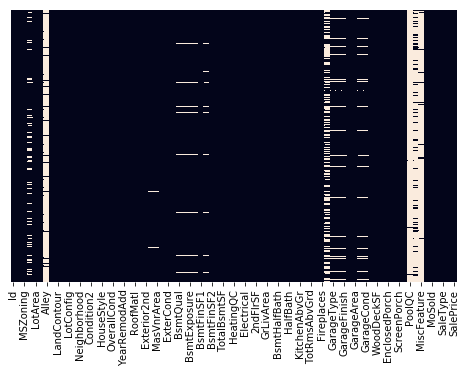

In [226]:
# let's check the null values and plot a HEAT MAP for more clarity
plt.figure(figsize=(8,5))
sns.heatmap(original_df.isnull(),yticklabels=False,cbar=False);

## Now Let's perform some EDA on the Original Dataframe before treating the missing values! But wait a minute, isn't it better to perform Data Handling first and then Visualize, just like Washing the CAR before going on a Long Drive!
### Let's do that first then!

In [227]:
# Info
print(original_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Now we would like to drop the null values beform performing the EDA as the road map for EDA which I am approaching is to plot all the Sophisticated Variables with Numerical and Categorical variables,with the target variable **SalePrice**.

In [228]:
# Why to again write the whole code for Checking the Null Value Percentage! Let's define the FUNCTION!
def check_missing_value_percentage(df):
    print(round(100*(df.isnull().sum().sort_values(ascending = False)/len(df.index)),2))

In [229]:
# Let's check the Missing Value in Percentage for the Data Frame!
check_missing_value_percentage(original_df)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

### Now, the road map for Handling Missing Values:

1. Drop the Variables where missing values is more than 90%.
2. Then we will isolate the Missing values for variables which are left out.
3. We will impute Separately for those variables, maybe using Forward Fill/Backward fill or by even MODE!

In [230]:
# Dropping the VARIABLES, where the missing value is more than equal to 90%
cleaned_df = original_df.dropna(thresh = len(original_df)*0.9,axis=1)
check_missing_value_percentage(cleaned_df)

GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageCond       5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
RoofMatl         0.00
RoofStyle        0.00
SalePrice        0.00
Exterior1st      0.00
Exterior2nd      0.00
YearBuilt        0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
YearRemodAdd     0.00
HouseStyle       0.00
OverallCond      0.00
OverallQual      0.00
BldgType         0.00
Condition2       0.00
Condition1       0.00
Neighborhood     0.00
LandSlope        0.00
LotConfig        0.00
Utilities        0.00
LandContour      0.00
LotShape         0.00
Street           0.00
LotArea          0.00
MSZoning         0.00
MSSubClass       0.00
BsmtFinSF1       0.00
Heating          0.00
BsmtFinSF2       0.00
EnclosedPorch    0.00
Fireplaces       0.00
GarageCars       0.00
GarageArea

Wow! Now we have just 12 to 13 variables with Less than 10% of the missing values and here imputation is possible, as some features have barely 3 to 4 missing values!
Let's do it then!

In [231]:
mv_variables = cleaned_df[['GarageType','GarageYrBlt','GarageFinish','GarageCond','GarageQual','BsmtExposure',
                'BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType','MasVnrArea','Electrical']]

In [232]:
NA_numerical = mv_variables.select_dtypes(exclude = 'object')
NA_categorical = mv_variables.select_dtypes(include = 'object')
print(NA_numerical.info())
print('-------------------------------------')
print(NA_categorical.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
GarageYrBlt    1379 non-null float64
MasVnrArea     1452 non-null float64
dtypes: float64(2)
memory usage: 22.9 KB
None
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
GarageType      1379 non-null object
GarageFinish    1379 non-null object
GarageCond      1379 non-null object
GarageQual      1379 non-null object
BsmtExposure    1422 non-null object
BsmtFinType2    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtCond        1423 non-null object
BsmtQual        1423 non-null object
MasVnrType      1452 non-null object
Electrical      1459 non-null object
dtypes: object(11)
memory usage: 125.5+ KB
None


Since we had **1460** rows, we will impute values for the Significant Variables only.

In [233]:
# GarageYrBlt, let's us the know about the year in which the garage was built, but it is insignificant as no one cares, when was the garage built or bathroom built. People care if Garage/Bathroom/Balcony is there or not in the house.
cleaned_df.drop(['GarageYrBlt'] , axis=1,inplace=True)
# Also, we will impute the MasVnrArea with the MODE value as we have only 8 values missing. This type of imputation does not makes the dataset go biased.
cleaned_df['MasVnrArea'] = cleaned_df['MasVnrArea'].fillna(cleaned_df['MasVnrArea'].mode()[0])

In [234]:
check_missing_value_percentage(cleaned_df)

GarageQual       5.55
GarageType       5.55
GarageFinish     5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrType       0.55
Electrical       0.07
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
SalePrice        0.00
Exterior2nd      0.00
YearBuilt        0.00
MasVnrArea       0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
YearRemodAdd     0.00
HouseStyle       0.00
OverallCond      0.00
OverallQual      0.00
BldgType         0.00
Condition2       0.00
Condition1       0.00
Neighborhood     0.00
LandSlope        0.00
LotConfig        0.00
Utilities        0.00
LandContour      0.00
LotShape         0.00
Street           0.00
LotArea          0.00
MSZoning         0.00
MSSubClass       0.00
BsmtFinSF1       0.00
TotalBsmtSF      0.00
BsmtFinSF2       0.00
EnclosedPorch    0.00
Fireplaces       0.00
GarageCars       0.00
GarageArea       0.00
PavedDrive

Now for **Categorical Variables** , we will use the Forward Fill technique as we have max to max 100 values missing, which can be imputed by using mode also or better, we will impute them by **NONE**, but to keep the nature of the Data Set, we intend to use the **FF** technique here for the Values where missing value count is low!

In [235]:
# Forward Fill Function!

def apply_forward_fill(df,list_of_cols):
    for col in list_of_cols:
        df[col] = df[col].fillna(method = 'ffill')
        
apply_forward_fill(cleaned_df,NA_categorical.columns.to_list())

In [236]:
cols = cleaned_df.columns
for col in cols:
    if cleaned_df[col].dtype == 'object':
        cleaned_df[col] = cleaned_df[col].fillna('None')

In [237]:
check_missing_value_percentage(cleaned_df)

SalePrice        0.0
YearRemodAdd     0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
RoofStyle        0.0
YearBuilt        0.0
SaleCondition    0.0
OverallCond      0.0
MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch

In [238]:
cleaned_df.head(15)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Attchd,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,Attchd,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,Detchd,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,Attchd,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,0,1,2008,WD,Normal,118000


### Woah! We did the DATA Cleaning in a pretty Sophisticated Mannered WAY!

## Next Step is to Perform the EDA in reference to our target variables, which is SALEPRICE!

1. We might infer some kind of Curvy pattern for some of the variables, which tells the dependency behaviour for that variable.
2. We have to make the Visualytic Inferences, so that the variables which may not get involved in the Machine learning Model, coyld be interpreted here and if necessary, we can use them.
3. We will also look on the Correlation Plot to justify those Variables.
4. Then we will be looking on the **OUTLIERS** and based on the decision, we will look for the treatment if requried.
5. Finally, we will be Dummying/Encoding the Variables, based on the levels present in a variable.

In [239]:
cleaned_df.head(8)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Attchd,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,Attchd,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000


In [240]:
print(cleaned_df.shape)

(1460, 74)


In [241]:
def plot_scatter_plot(df,list_of_vars,var2):
    x=1
    plt.figure(figsize=(8,25))
    for i in list_of_vars:
        plt.subplot(len(list_of_vars)/2,2,x)
        plt.subplots_adjust(wspace=0.4,hspace=2.5)
        sns.scatterplot(x = df[i],y=df[var2]);
        x = x+1

In [242]:
numerical_dtypes = cleaned_df.select_dtypes(exclude='object')
numerical_dtypes_list = numerical_dtypes.columns.to_list()

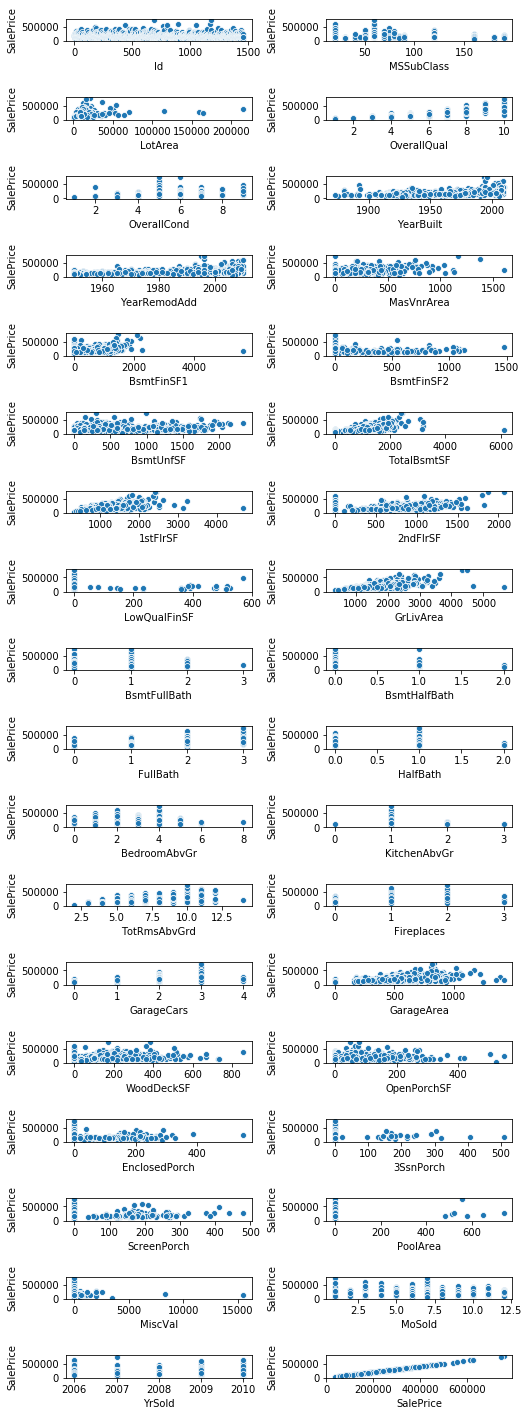

In [243]:
plot_scatter_plot(cleaned_df,numerical_dtypes_list,'SalePrice')

We can deduce the following inferences from the above Scatter Plots:
1. Total Area of Basement has a Linear Relationship with the Sale Price.
2. First Floor and Second Floor Areas also have the linear relationship with the Sale Price!
3. The Area above the ground is also Linearly dependent on Sale price.
4. Also, total Basement Surface Area variable has Linear Relationship with Sale Price.

This means that the more these variables are in Magnitude, the more is the Sale Price.

### Now we will try to Look for the categorical variables as part of EDA!

In [244]:
# Instead of Looking at Individual variable with the same piece of Code, we try to build a reusable function and apply over all the Categorical Variables and Save our time!
def plot_barplot(df,var1,var2):
    plt.figure(figsize=(12,5))
    sns.barplot(x = var2,y = var1,data=df);
    plt.xticks(rotation=40)
    plt.title(var2+' vs. ' + var1)

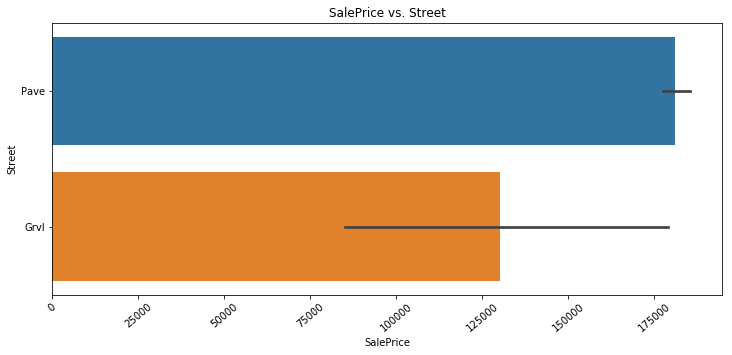

In [245]:
# Looking for the Kind of Street where the Houses are expensive!
plot_barplot(cleaned_df,'Street','SalePrice')

In [246]:
# Now let's get the Total Categorical variables
categorical_vars = cleaned_df.select_dtypes(include='object')
categorical_vars_list = categorical_vars.columns.to_list()

In [247]:
len(categorical_vars_list)
# So now we can plot for each of the categorical variable!

38

In [248]:
# But wait, we will first segregreate the Variables where Levels are more and it tends to be difficult to plot.
for var in categorical_vars_list:
    print(cleaned_df[var].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1260
Feedr       81
Artery     

So we will now plot all the Categorical variables with the target variable **SalePrice** and make some Inferences!
Later on we will do our Feature Engineering!

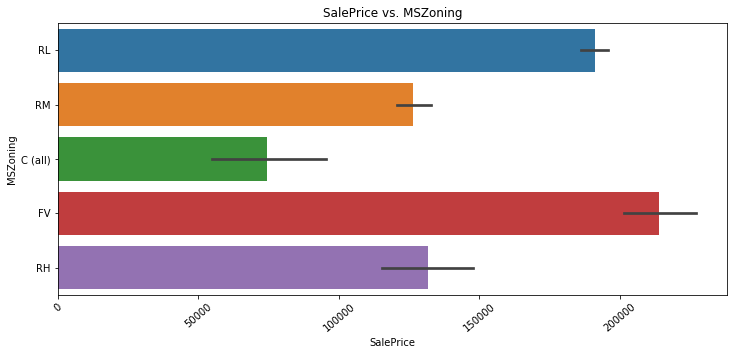

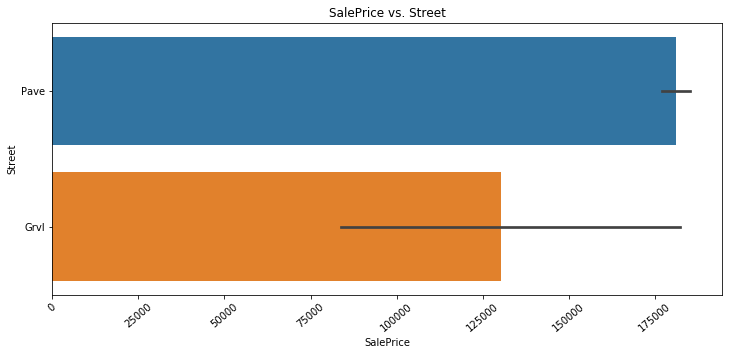

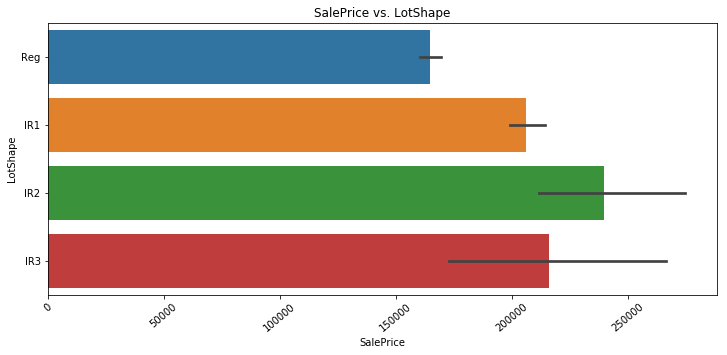

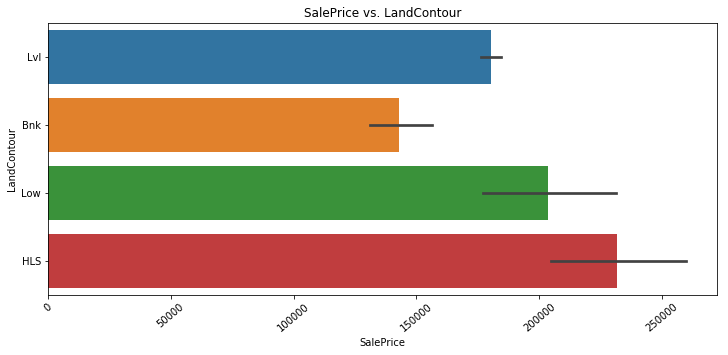

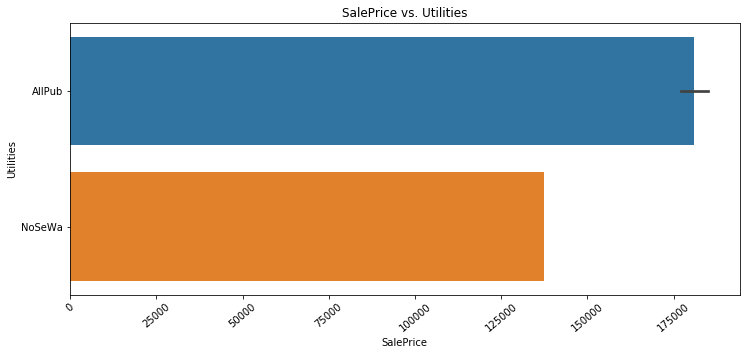

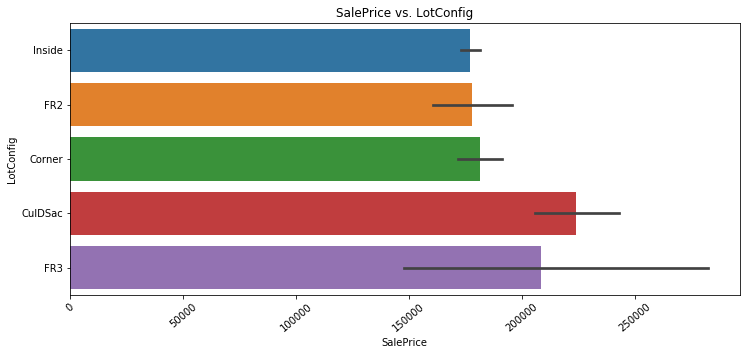

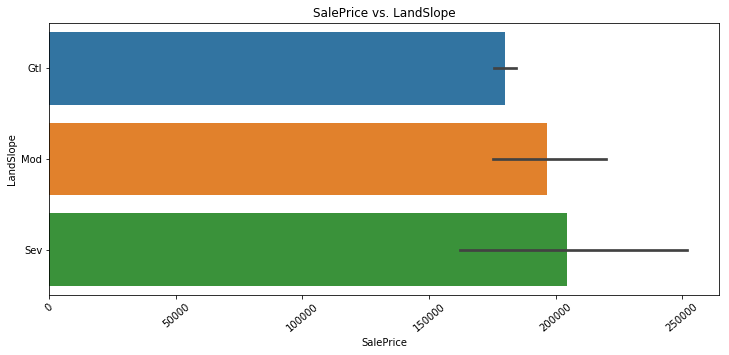

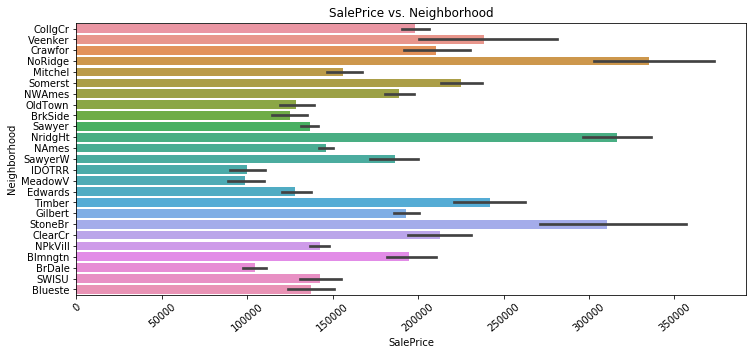

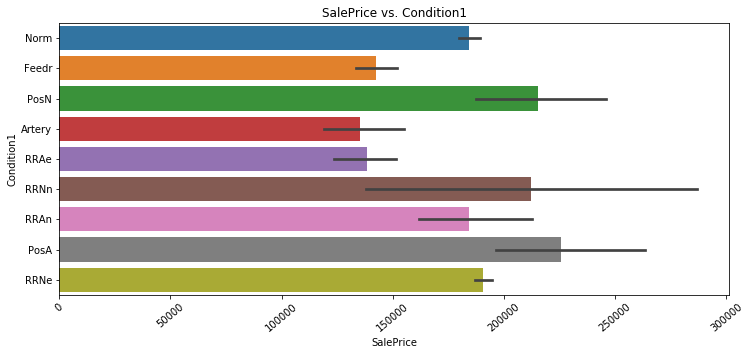

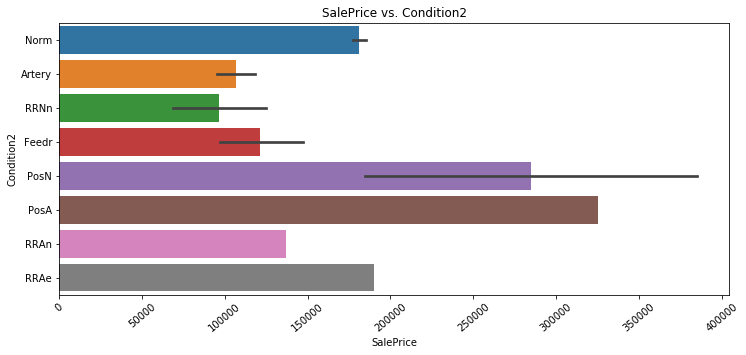

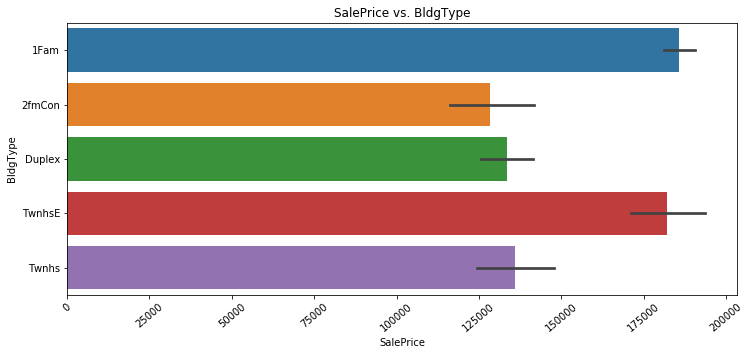

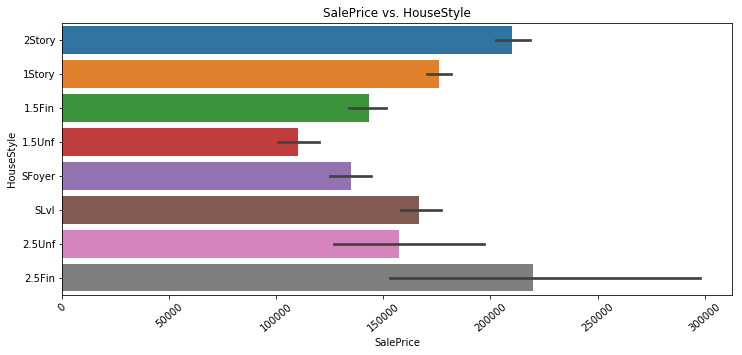

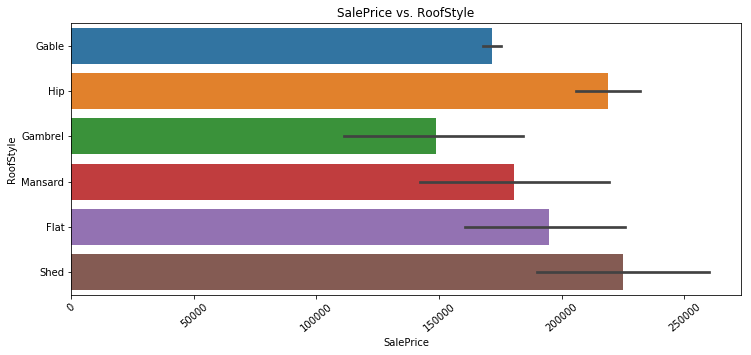

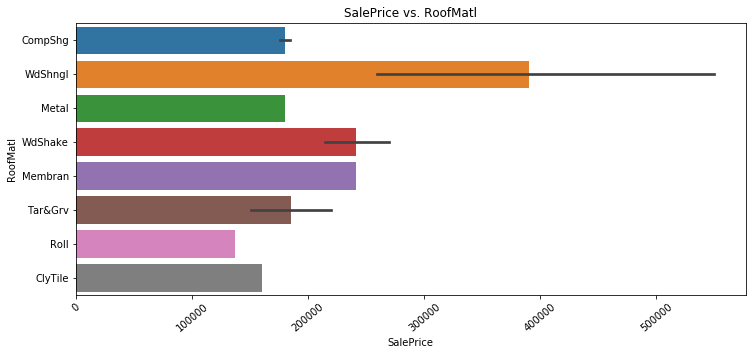

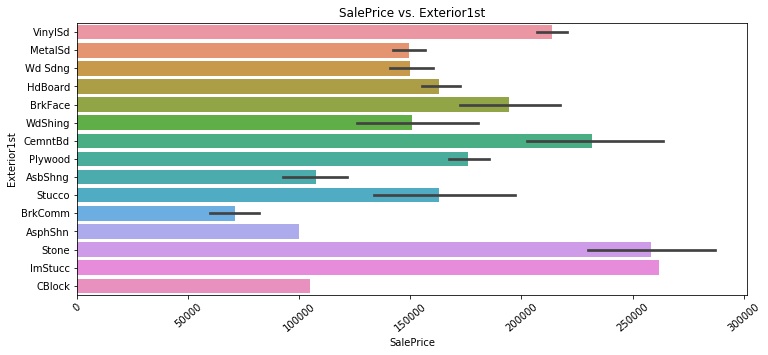

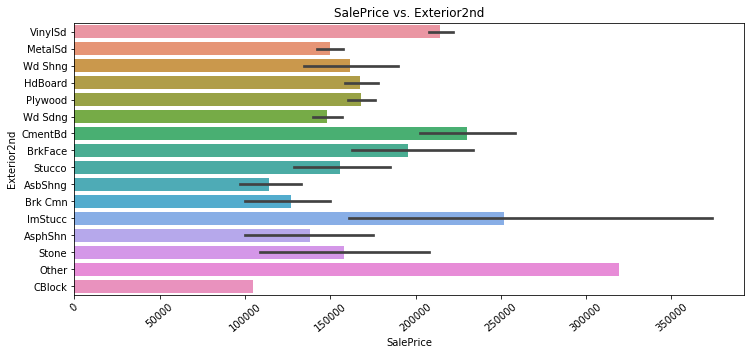

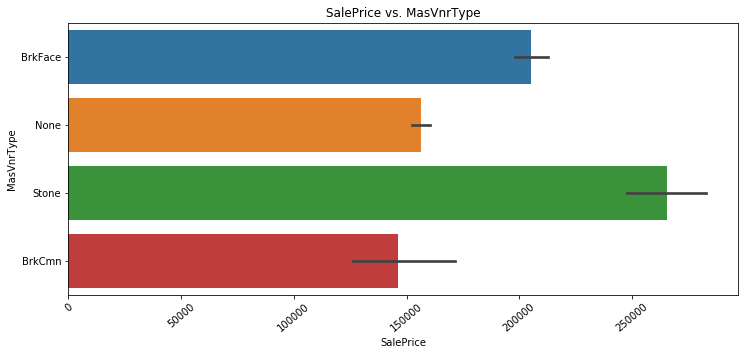

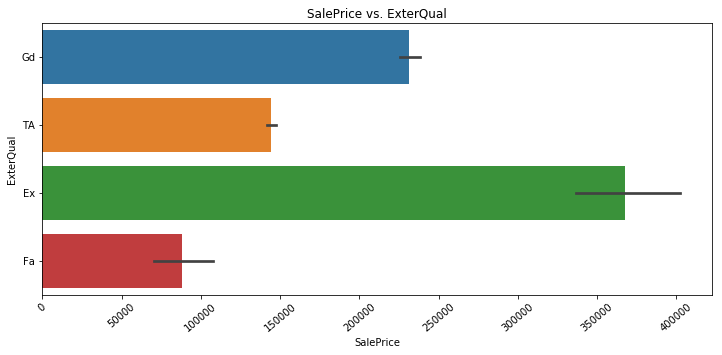

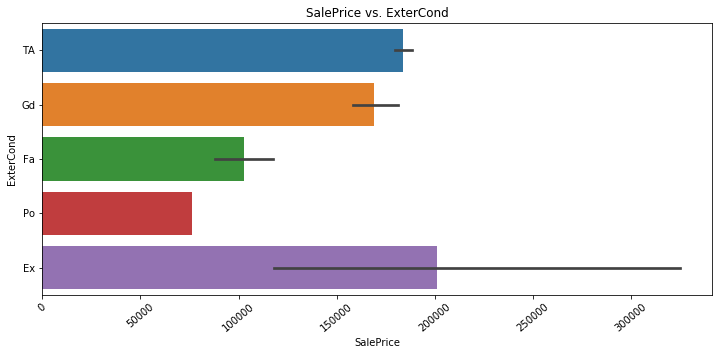

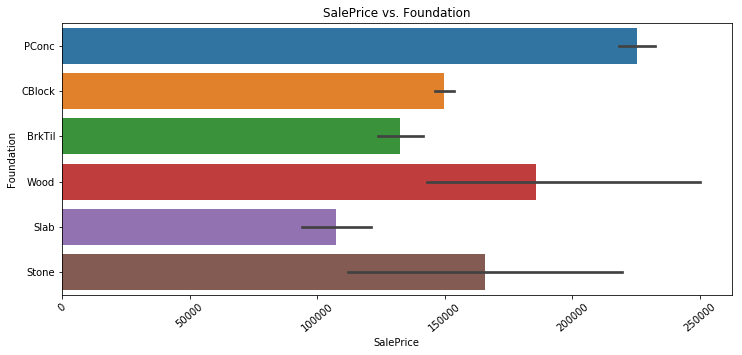

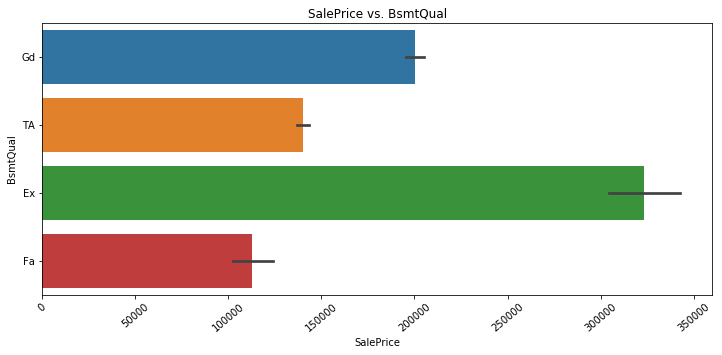

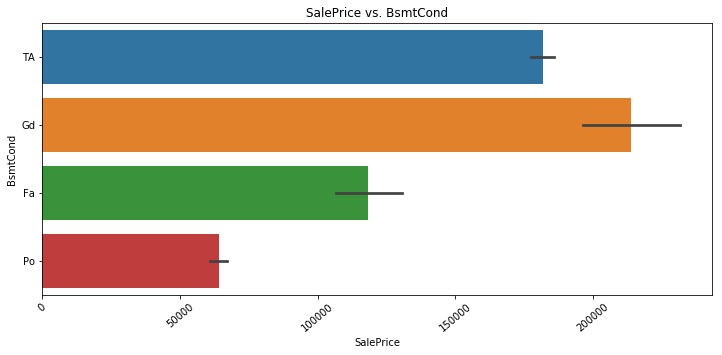

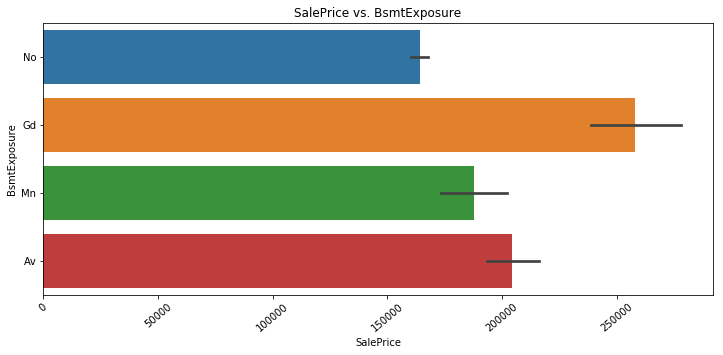

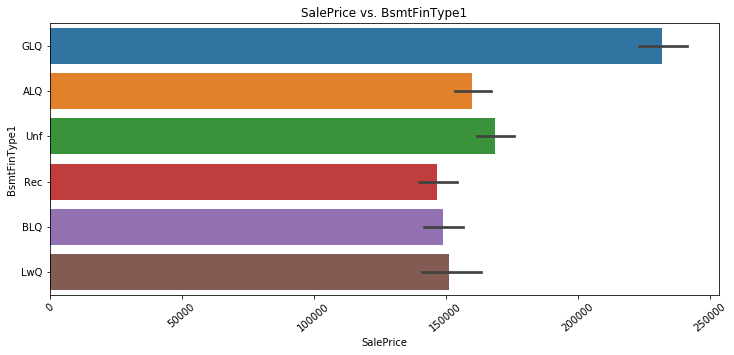

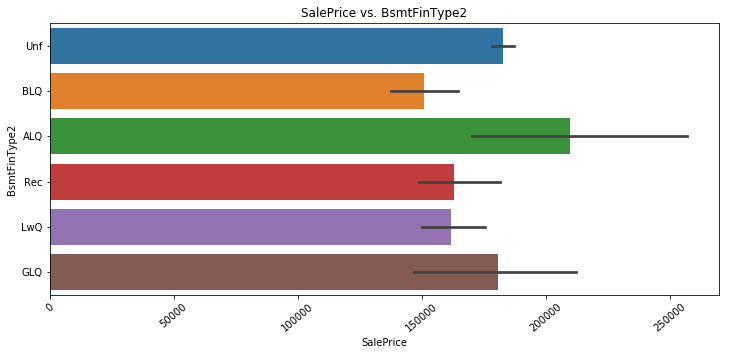

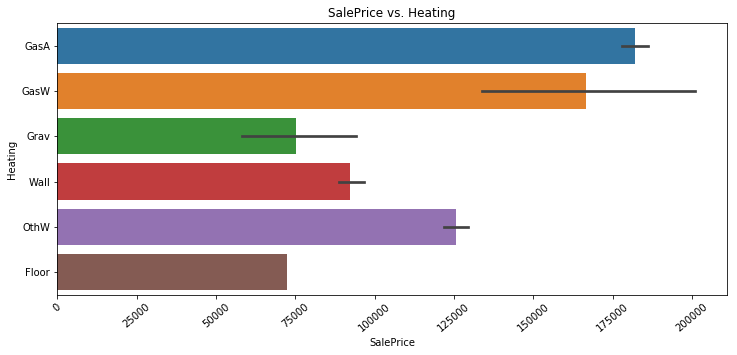

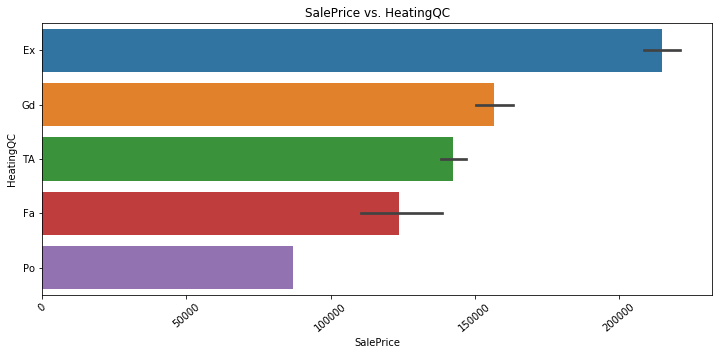

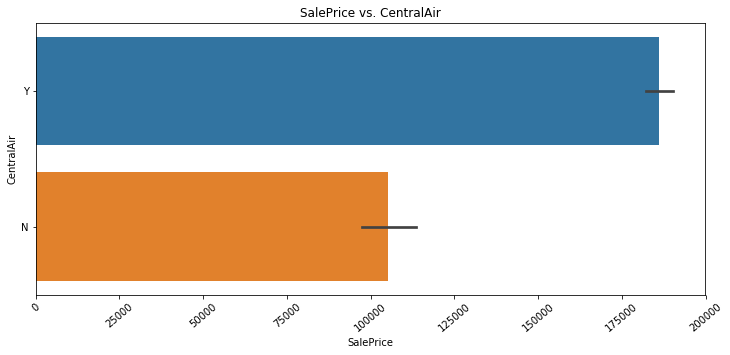

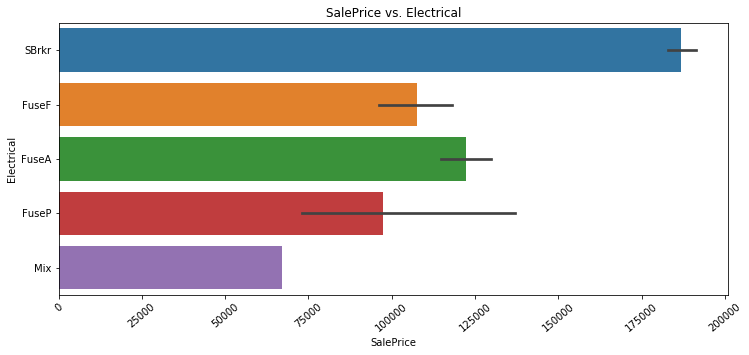

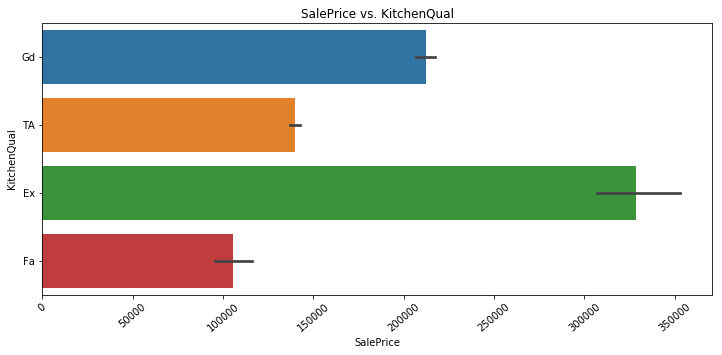

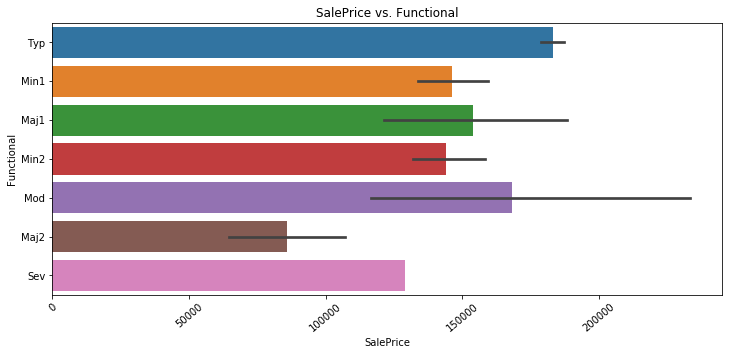

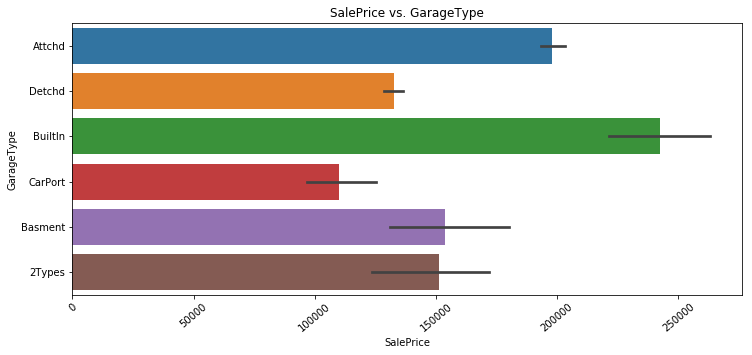

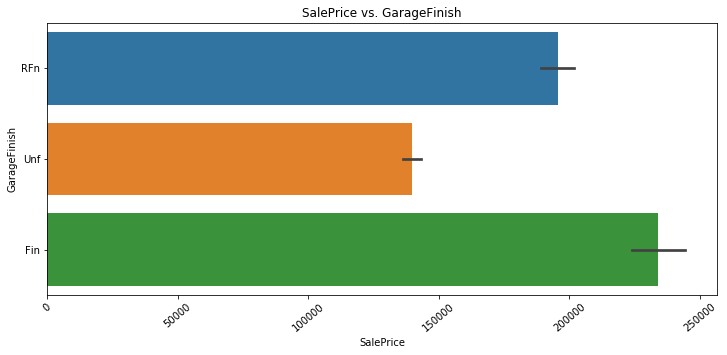

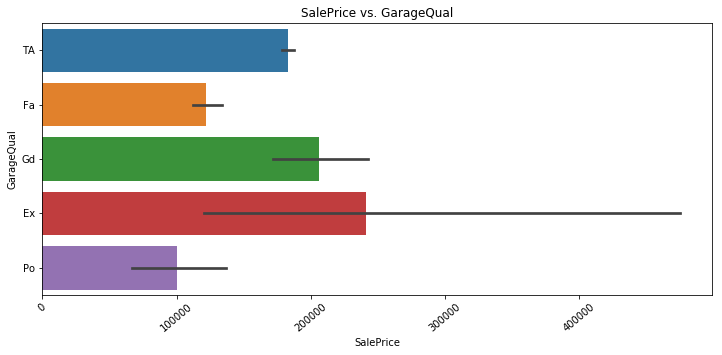

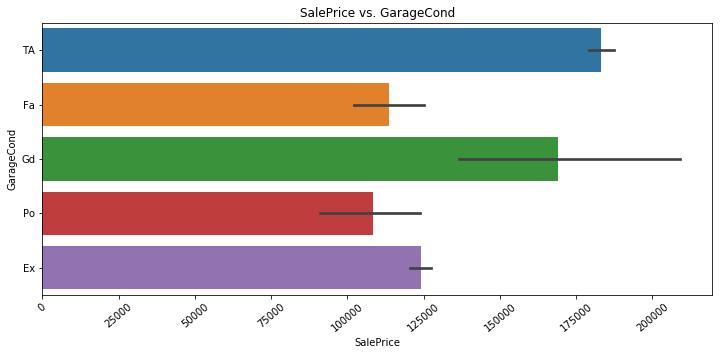

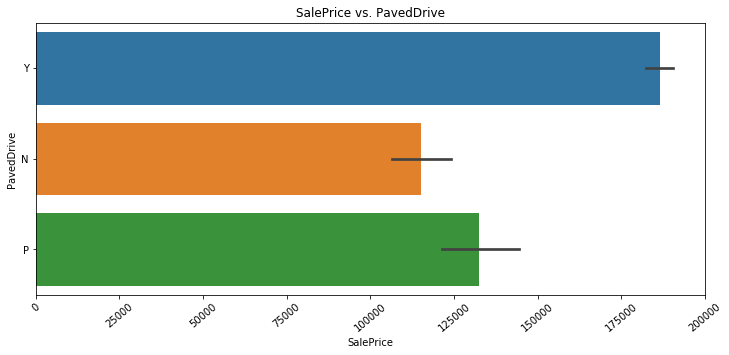

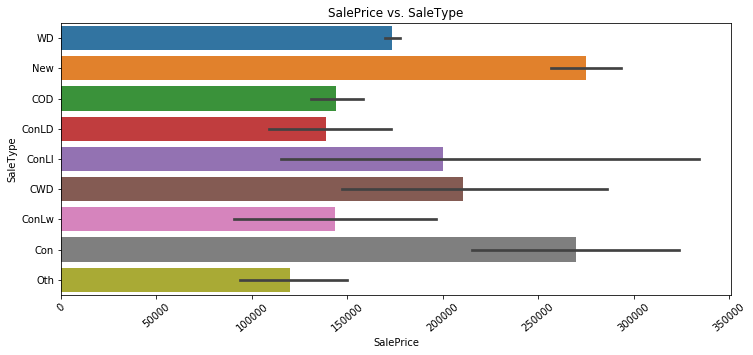

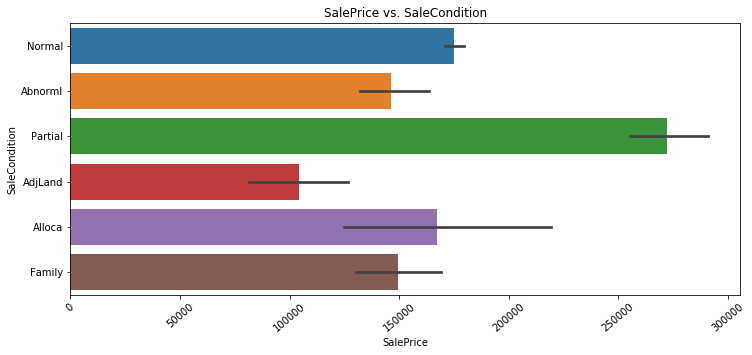

In [249]:
for var in categorical_vars_list:
    plot_barplot(cleaned_df,var,'SalePrice')

So we deduce the following Observations from the above graphs!

1. The **Floating Village Residential Zoning** tend tto have more Sale Price, followed by **Low Density Residential Places**.
2. The **Paved Street** located houses have Higher SalePrice in general.
3. More over, the Houses which have **Heating Quality and Condition** are excellent, tend to have Higher SalePrice!. Similarly,    goes for **Kitchen Quality, Basement Exposure, Basement Quality, Garage Condition, Garage Quality** and for other evaluative    variables.
4. **Moderately Irregular and Hill Side properties** tend to have more SalePrice as one prefers to be on the top of the world in    order to get a better view.
5. The Houses where the **Sale Condition is partial** tend to have Higher Sale price ass they have the window of getting            renovated according to the new customer.
6. There are 3 types of **SaleType** which attracts high Saleprice. These are **Houses which are Newly constructed and Sold        (New), Houses which are on Contract of 15% down payment of regular terms(Con) and Houses which have Low Interest on the          Contract  made.** This means that the users are looking for **Cheaper ways in order to afford lavish Houses**.
7. The one important point to quote is the **Proximity of the Various Conditions**. Houses which are **Nearer to                    Parks,Greenbelts or any Offsite feature(PosN), tend to have High Sale Price**, but more expensive are the properties which      are just **adjacent to these Offsite features(PosA)**.

Next we can do is plot some Variables, which are affecting the other Features. Like : Looking at the Sale price for Hill Side properties with the affect of Proximity Condtions. Looking at the SalePrice, with the SaleType with the HUE of SaleCondition!

**Let's see such figures!**

In [250]:
def plot_with_hue(df,var1,var2,var_hue):
    plt.figure(figsize=(8,8))
    sns.barplot(x = var1,y=var2,hue = var_hue,data=df);
    plt.title(var1+' with '+var2+' with hue of '+var_hue)

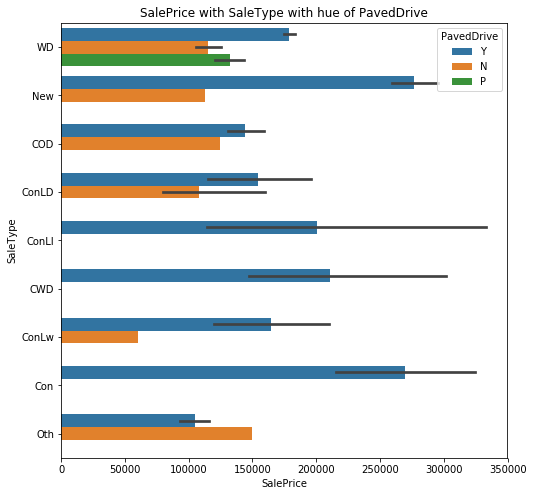

In [251]:
plot_with_hue(cleaned_df,'SalePrice','SaleType','PavedDrive')

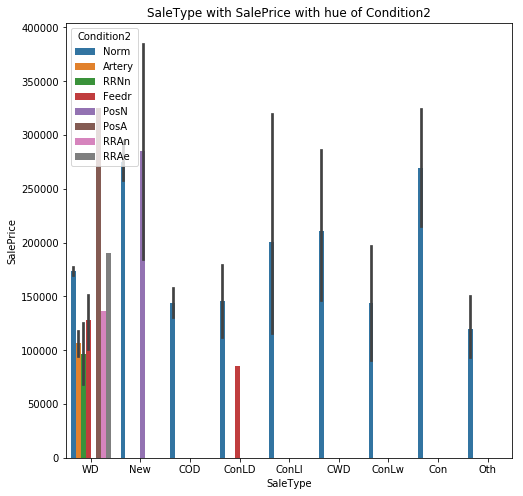

In [252]:
plot_with_hue(cleaned_df,'SaleType','SalePrice','Condition2')

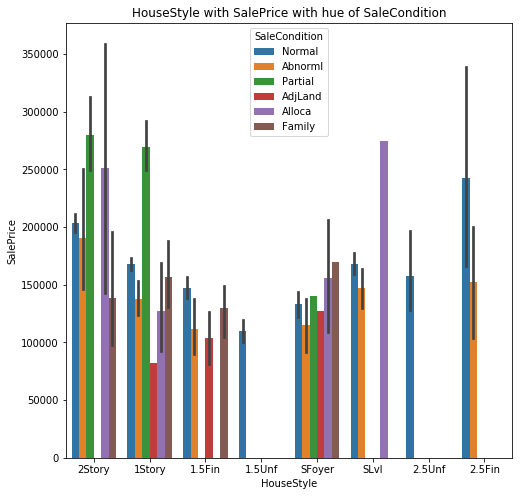

In [253]:
plot_with_hue(cleaned_df,'HouseStyle','SalePrice','SaleCondition')

In [254]:
print(categorical_vars_list)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


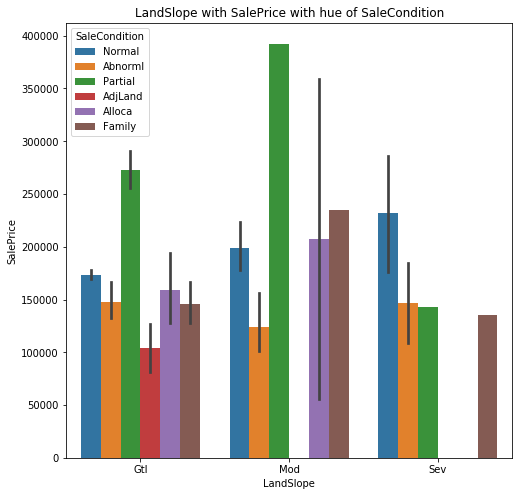

In [255]:
plot_with_hue(cleaned_df,'LandSlope','SalePrice','SaleCondition')

Inferences from the above plots:
1. Maximum Price Variation of the Houses are noticed for the Paved Driveable Roads for the Houses which have 15% down payment on the Contract, followed by the New Houses constructed and sold respectively.
2. Also, the Houses which are partially completed in terms of Sale Type with Moderate Land Slope thends to have more Sale Price, followed by the Allocation of two Linked Properties.
3. Maximum Jump in the Sale price is noticed for the 2 Story House Style with the Allocated 2 properties Linked together.

Next we will now perform our Feature Engineering, but before that, Let us have a quick look on the Correlation Matrix for the Prepared Data Frame!

In [256]:
corrdf = cleaned_df.copy()

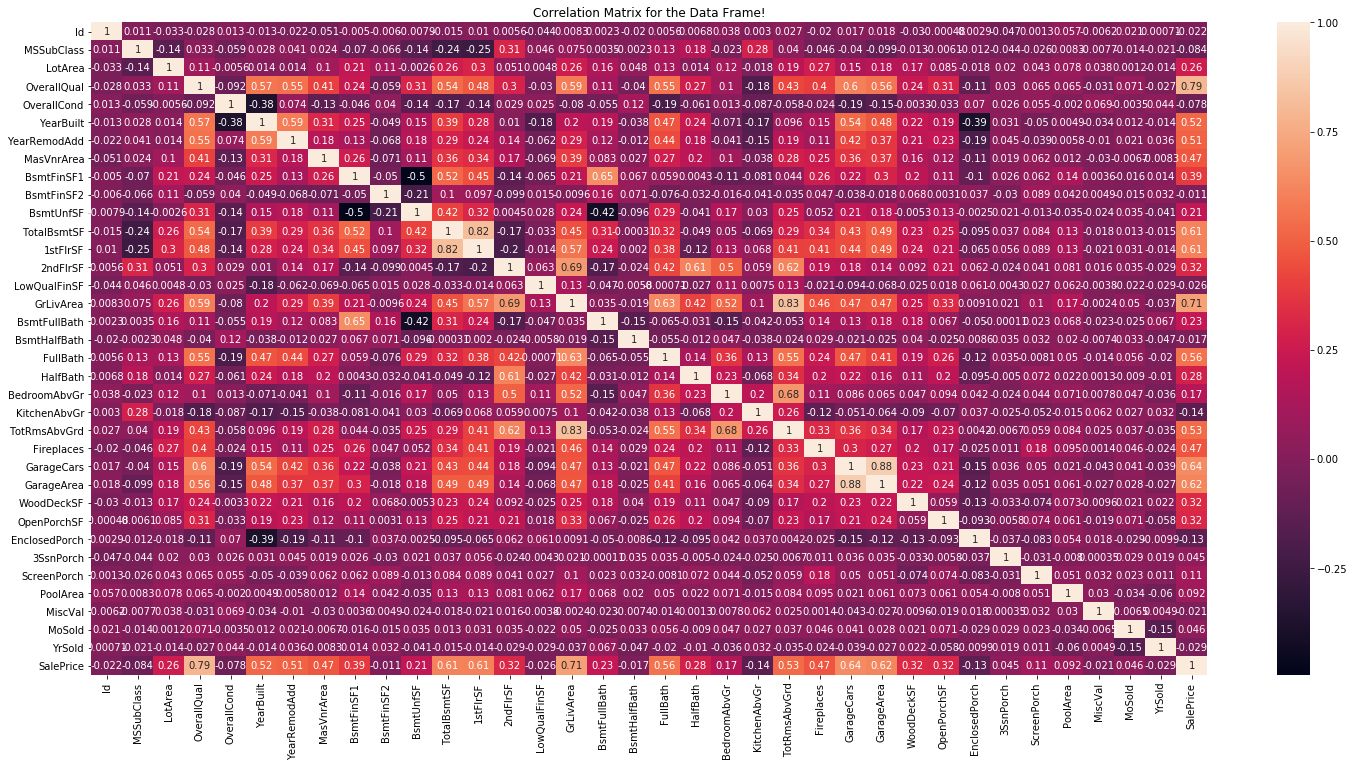

In [257]:
plt.figure(figsize=(25,12))
sns.heatmap(corrdf.corr(),annot=True);
plt.title('Correlation Matrix for the Data Frame!');

**We are not dropping the Highly correlated variables as from the Business aspect we nee the areas of 1st Floor, 2nd Floor, garage, Ground Living area.**. If these variables are insificant, it will be automatically ommitted by the **Lasso Regression** model which we will build.

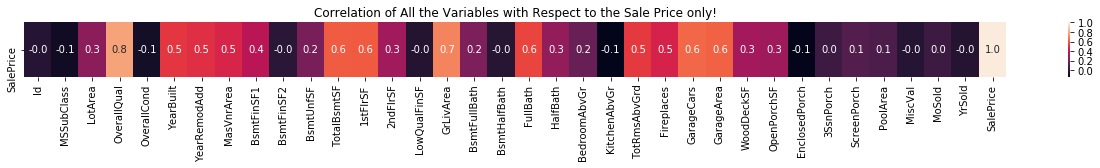

In [258]:
plt.figure(figsize=(22,1))
# Since our target variable is SalePrice, we will look for the Correlation for that only!
sns.heatmap(cleaned_df.corr().sort_values(by=['SalePrice']).tail(1),annot=True,fmt='.1f');
plt.title('Correlation of All the Variables with Respect to the Sale Price only!');

1. Features such as **FullBath, Total basement Surface Area,1st Floor Surface Area,Garage Area have a Higher Correlation**. This would result in more Luxurious property and hence more Sale Price indeed.
2. Feature such as **Year built** also, tends to influence the Sale price and newer properties will have Higher Sale price indeed.
3. More over the features to notice are the **Over All Quality of the Property, Living Area** have the highest Correlation values which is justified as better quality and large area of the property tends to have a Higher Sale price.

Fun Fact: **It is better to take a LOAN! if buying a House!**

Now Let's do what I have been wanting for. Let me explain!
Since we have variables such as **Full Bath,Half Bath,Surface Area for different rooms and the year in which they were built and year in which the house was remodelled**. Why don't we add them and find new features which are sum to these and describe more information.
Note: Since these variables are more valuable to us while predicting the Price, we intend to do Feature Engineering on them.

In [259]:
# Calculating the Total Area of the Property.
cleaned_df['Total_Property_Area'] = cleaned_df['GarageArea'] + cleaned_df['1stFlrSF']+cleaned_df['2ndFlrSF'] + cleaned_df['TotalBsmtSF'] + cleaned_df['GrLivArea'] 
# Calculating All the Bathrooms in the Property
cleaned_df['Total_Bathrooms'] = cleaned_df['HalfBath']*0.5 + cleaned_df['FullBath']
# Finally the Average starting Life of the Property in Years
cleaned_df['Average_Starting_year'] = (cleaned_df['YearBuilt']+cleaned_df['YearRemodAdd'])/2

In [260]:
# Let's Look what we have got!
cleaned_df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Total_Property_Area,Total_Bathrooms,Average_Starting_year
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,4824,2.5,2003.0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,4246,2.0,1976.0
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,5100,2.5,2001.5
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,4832,1.0,1942.5
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,6377,2.5,2000.0


Feature Engineering is performed so that we can see if any other **Feature** which gets derived might affect the Target Value.
Here we can say one thing **The more the Property Area is, the Higher the Sale Price should be, but it maybe possible that Larger the Area of the property, but poorly maintained property might have a Low Sale Price indeed!**

Till here we have done our **Data Interpretation, EDA, Data Cleaning, Data Handling and Feature Engineering**. We also looked at the inferences of the variables affecting our Sale Price, such ass Surface Area of the 1st and 2nd Floor Rooms, highly maintaned properties and more. 
Next we will check for Outliers and perform the Outlier Treatment, post which we will start our **Scaling the untouched variables and then our Machine Learning Model!**

But before that, let's **Encode our Categorical Features** and then move for Outlier Detection!

**We will be Dummying those variables which have only 3 or 4 Levels, while for other we will be Hot Encoding the others!**.

In [261]:
house_categorical = cleaned_df.select_dtypes(include=['object'])
house_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [262]:
# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0

In [263]:
# drop categorical variables 
cleaned_df = cleaned_df.drop(list(house_categorical.columns), axis=1)

In [264]:
# concat dummy variables with X
cleaned_df = pd.concat([cleaned_df, house_dummies], axis=1)

#### Outlier Analysis!

In [265]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 235 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(36), uint8(196)
memory usage: 724.4 KB


In [266]:
numerical_cleaned_df = cleaned_df.select_dtypes(exclude='object')

In [267]:
numerical_cleaned_df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Total_Property_Area,Total_Bathrooms,Average_Starting_year,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,4824,2.5,2003.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,

In [268]:
# Plotting Outliers
def plot_outlier(df,var1,var2):
    plt.figure(figsize=(5,5))
    sns.scatterplot(x = var1,y = var2,data=df);
    plt.title('Plotting Outliers for '+var1);

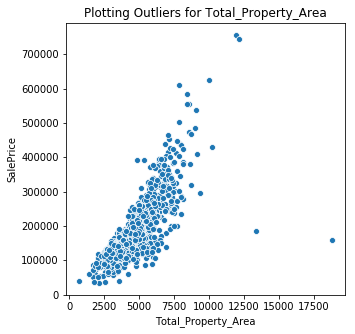

In [269]:
# We will plot Scatter Plot for the Various Numerical Features and try to see if any Outliers are there!
plot_outlier(numerical_cleaned_df,'Total_Property_Area','SalePrice')

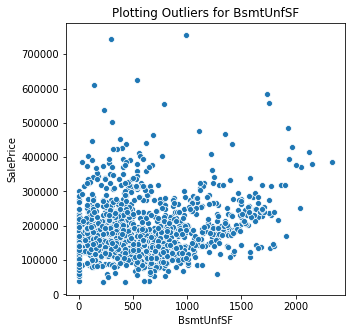

In [270]:
plot_outlier(numerical_cleaned_df,'BsmtUnfSF','SalePrice')

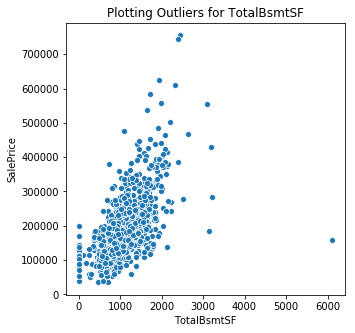

In [271]:
plot_outlier(numerical_cleaned_df,'TotalBsmtSF','SalePrice')

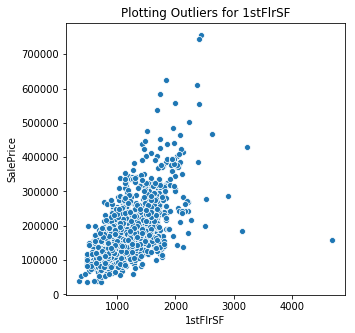

In [272]:
plot_outlier(numerical_cleaned_df,'1stFlrSF','SalePrice')

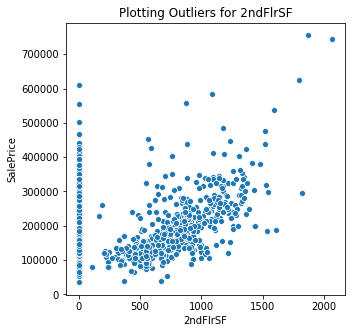

In [273]:
plot_outlier(numerical_cleaned_df,'2ndFlrSF','SalePrice')

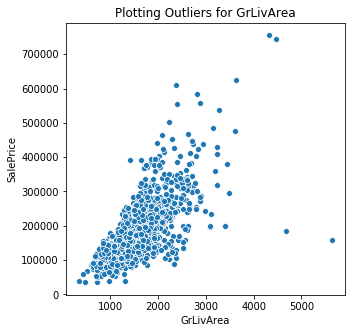

In [274]:
plot_outlier(numerical_cleaned_df,'GrLivArea','SalePrice')

In [275]:
def plot_multiple_outlier_plots(df,list_of_vars,target_var):
    plt.figure(figsize=(8,45))
    x=1
    for i in list_of_vars:
        plt.subplot(len(list_of_vars)/2,2,x)
        plt.subplots_adjust(wspace=0.4,hspace=1.0)
        sns.scatterplot(x = df[i],y=df[target_var]);
        x = x+1

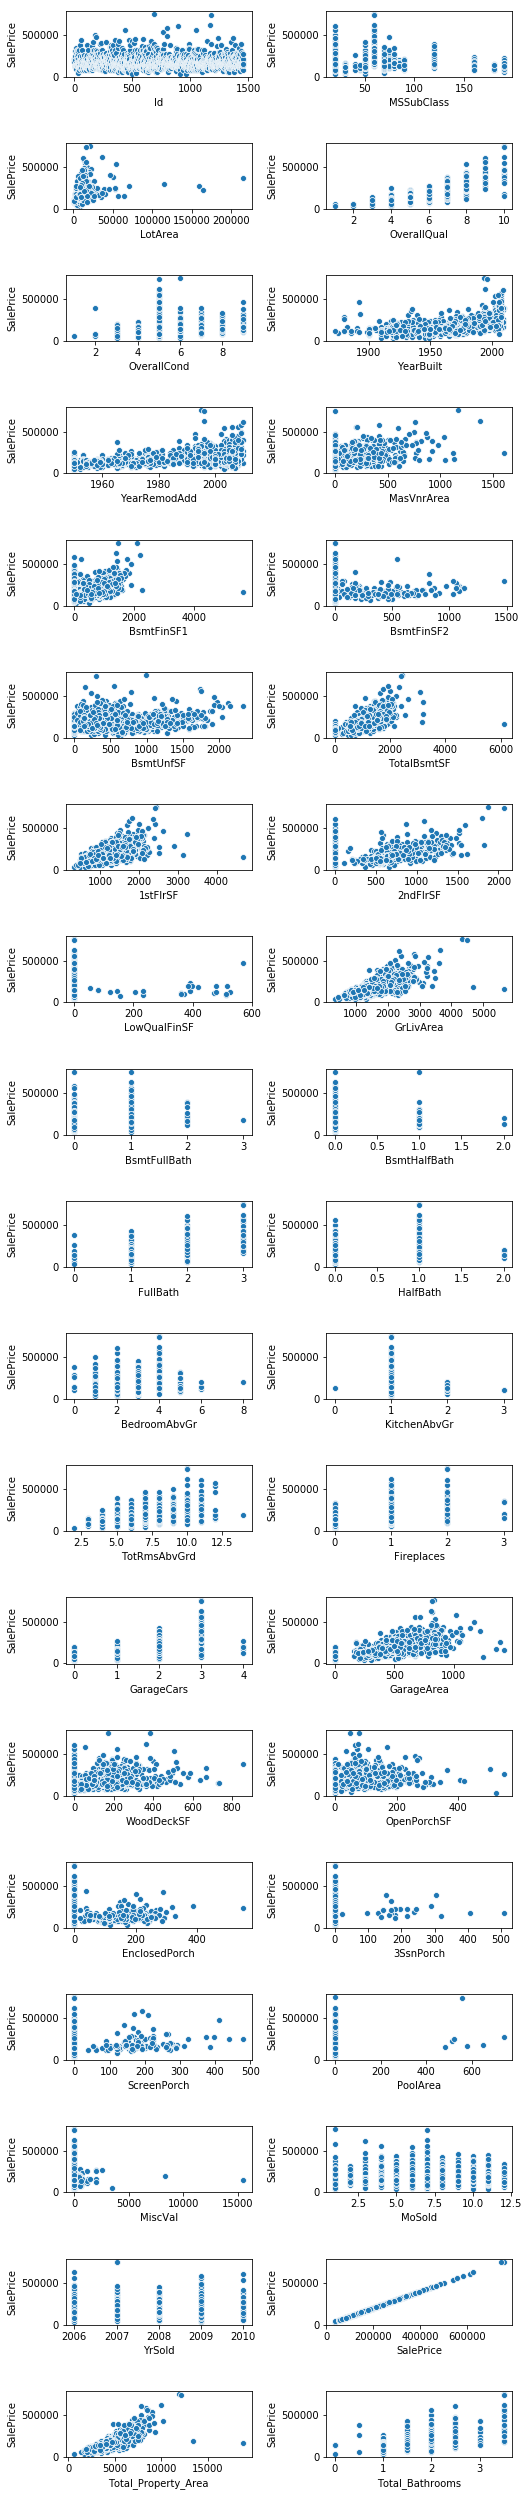

In [276]:
list_of_vars = numerical_cleaned_df.columns.to_list()
list_of_vars = list_of_vars[:38]
plot_multiple_outlier_plots(numerical_cleaned_df,list_of_vars,'SalePrice')
#len(list_of_vars)

#### So we can see that we have atmost 1 or 2 Outliers for Some important features which are continuous in nature which are 'Total Property Area,Garage Area,'Ground Living Area,1st Floor SF, 2nd Floor SF area' and some more.



In [277]:
df_outliers_treatment = cleaned_df.copy()
Q1 = cleaned_df.quantile(0.01)
Q3 = cleaned_df.quantile(0.99)
IQR = Q3 - Q1

In [278]:
cleaned_df_out = cleaned_df[~((cleaned_df < (Q1-1.5*IQR))|(cleaned_df>(Q3+1.5*IQR))).any(axis=1)]
cleaned_df_out.shape

(1195, 235)

Now we will also try to Treat the Outliers using the **Z-Score** Method and find the resulting shape!

In [279]:
from scipy import stats
df_outliers_treatment = df_outliers_treatment[(np.abs(stats.zscore(df_outliers_treatment[df_outliers_treatment.columns]))<3).all(axis=1)]
df_outliers_treatment.dropna(axis=0,inplace=True)
df_outliers_treatment.shape

(78, 235)

###### Checking Skewness!

Text(0.5,1,'Checking Skewenss in the Target Variable!')

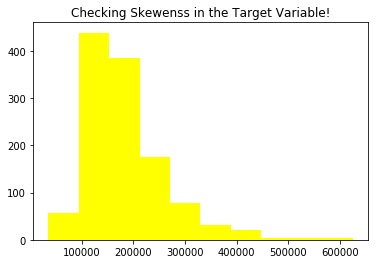

In [280]:
#cleaned_df_out = cleaned_df.copy()
plt.hist(cleaned_df_out.SalePrice,bins=10,color='yellow');
plt.title('Checking Skewenss in the Target Variable!')

In [281]:
cleaned_df_out['SalePrice'] = np.log1p(cleaned_df_out['SalePrice'])

Text(0.5,1,'Skewness is balanced using Log transformation!')

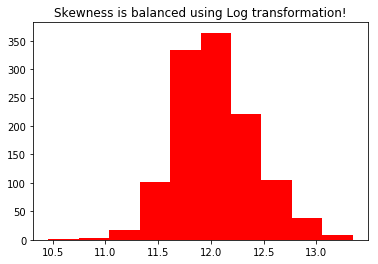

In [282]:
plt.hist(cleaned_df_out.SalePrice,bins=10,color='r');
plt.title('Skewness is balanced using Log transformation!')

### So we will take the Data Frame received from the IQR treatment as it has more data to train our Model and almost 8% of Data is lost which is bearable.

Now we need to **Scale our Data Set**, perform Splitting and then later on for Modelling!

In [283]:
# Getting the Target Variable!
y = np.array(cleaned_df_out['SalePrice'])
cleaned_df_out.drop('SalePrice',inplace=True,axis=1)

In [284]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(cleaned_df_out, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [285]:
# scaling the features
scaler=RobustScaler()
# transform "x_train"
X_train = scaler.fit_transform(X_train)
# transform "x_test"
X_test = scaler.transform(X_test)

## Now we proceed towards Model Building Process!

**We are not performing the Linear Regression Modelling as the Lasso and Ridge regression are going to produce more Robust and Simpler models with High number of features.**

# Ridge Regression!

In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients.
It shrinks the coefficients and helps to reduce the model complexity and multi-collinearity.
**Higher the alpha value, more restriction are on the coefficients; lower the alpha, more generalization, coefficients are barely restricted!**

In [286]:
# list of alphas to tune
parameters= {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
import sklearn.model_selection as ms

ridge = Ridge()

# cross validation
ridge_reg=GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)
ridge_reg.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [287]:
print('The Best value of Alpha is: ',ridge_reg.best_params_)
print('The Best score achieved : ',ridge_reg.best_score_)

The Best value of Alpha is:  {'alpha': 20}
The Best score achieved :  -0.01172087165361612


Since we have got the best **Alpha** to be **20**, we will perform comparisons with multiple alphas at time!

***Alpha = 0.0001***

In [288]:
ridge_mod_low=Ridge(alpha=0.0001)
ridge_mod_low.fit(X_train,y_train)
y_pred_train=ridge_mod_low.predict(X_train)
y_pred_test=ridge_mod_low.predict(X_test)
#Checking RMSE score! as evaluation metric!
print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_pred_train))))
# Checking R2 Score for the Model!
print('Train R2 Score: ' + str(r2_score(y_train,y_pred_train)))
print('Test R2 Score: ' + str(r2_score(y_test,y_pred_test)))
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_pred_test))))  

Root Mean Square Error train = 0.08504994338217925
Train R2 Score: 0.9497916191056189
Test R2 Score: 0.9230947434296357
Root Mean Square Error test = 0.1036429650171717


***Alpha = 1***

In [289]:
ridge_mod_1=Ridge(alpha=1)
ridge_mod_1.fit(X_train,y_train)
y_pred_train=ridge_mod_1.predict(X_train)
y_pred_test=ridge_mod_1.predict(X_test)
#Checking RMSE score! as evaluation metric!
print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_pred_train))))
print('Train R2 Score: ' + str(r2_score(y_train,y_pred_train)))
print('Test R2 Score: ' + str(r2_score(y_test,y_pred_test)))
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_pred_test))))  

Root Mean Square Error train = 0.08631481801241127
Train R2 Score: 0.9482871018903669
Test R2 Score: 0.9162689777072631
Root Mean Square Error test = 0.10814464340011821


***Alpha = 20***

In [290]:
ridge_mod_20=Ridge(alpha=20)
ridge_mod_20.fit(X_train,y_train)
y_pred_train=ridge_mod_20.predict(X_train)
y_pred_test=ridge_mod_20.predict(X_test)
#Checking RMSE score! as evaluation metric!
print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_pred_train))))
print('Train R2 Score: ' + str(r2_score(y_train,y_pred_train)))
print('Test R2 Score: ' + str(r2_score(y_test,y_pred_test)))
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_pred_test))))  

Root Mean Square Error train = 0.09296320977925093
Train R2 Score: 0.940013934187321
Test R2 Score: 0.9144190683498911
Root Mean Square Error test = 0.10933276239059475


Now let's plot the variables which have been received from performing the Ridge Regression and which one is more important towards predicting the House Price!

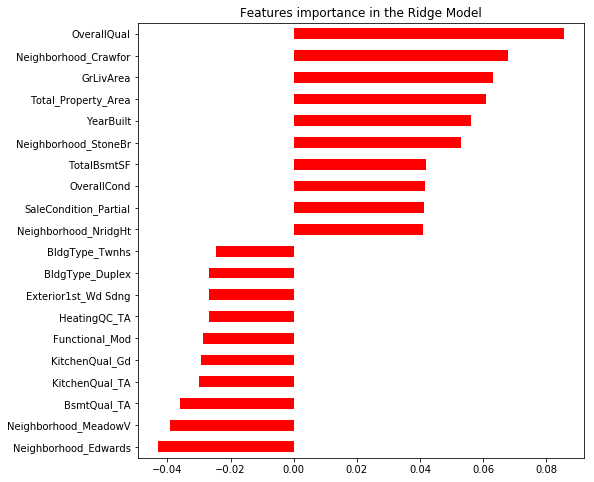

In [291]:
plt.figure(figsize=(8,8))
coefs = pd.Series(ridge_mod_20.coef_, index = cleaned_df_out.columns)
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color='red')
plt.title("Features importance in the Ridge Model")
plt.show()

Let's look at the results produced by the model and the graph which helps us in deciding the value of Alpha/Supports the value of Alpha!

In [292]:
cv_results = pd.DataFrame(ridge_reg.cv_results_)
# we donot want the result for alpha's to be more than 200, just for time and memory saving purpose!
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.024184,0.002479,0.000803,0.000401,0.0001,{'alpha': 0.0001},-0.016928,-0.011632,-0.009003,-0.015002,-0.013589,-0.013235,0.002735,26,-0.006165,-0.007181,-0.007512,-0.006399,-0.006496,-0.006751,0.000509
1,0.017790,0.000747,0.000599,0.000489,0.001,{'alpha': 0.001},-0.016930,-0.011625,-0.008996,-0.015001,-0.013582,-0.013231,0.002738,25,-0.006165,-0.007181,-0.007512,-0.006399,-0.006496,-0.006751,0.000509
2,0.020988,0.002606,0.000600,0.000490,0.01,{'alpha': 0.01},-0.016950,-0.011561,-0.008949,-0.015000,-0.013517,-0.013200,0.002764,24,-0.006166,-0.007182,-0.007513,-0.006400,-0.006497,-0.006751,0.000509
3,0.028584,0.014533,0.001200,0.000400,0.05,{'alpha': 0.05},-0.017005,-0.011367,-0.008842,-0.015021,-0.013295,-0.013111,0.002834,23,-0.006178,-0.007188,-0.007524,-0.006408,-0.006512,-0.006762,0.000508
4,0.022787,0.005597,0.000599,0.000489,0.1,{'alpha': 0.1},-0.017042,-0.011207,-0.008771,-0.015026,-0.013098,-0.013034,0.002884,22,-0.006198,-0.007197,-0.007543,-0.006422,-0.006540,-0.006780,0.000506


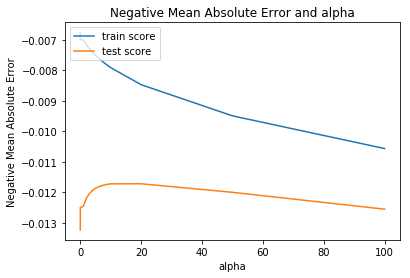

In [293]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

We can see that there is a **tiny tiny** break at alpha = **20**.
Hence **Alpha = 20** is Justified!

***Evaluation of the Scores!***

In [294]:
Ridge_train_score = ridge_mod_low.score(X_train,y_train)
Ridge_test_score = ridge_mod_low.score(X_test, y_test)
Ridge_train_score_1 = ridge_mod_1.score(X_train,y_train)
Ridge_test_score_1 = ridge_mod_1.score(X_test, y_test)
Ridge_train_score_20 = ridge_mod_20.score(X_train,y_train)
Ridge_test_score_20= ridge_mod_20.score(X_test, y_test)
print('Train Accuracy with 0.0001: ',Ridge_train_score,'Test Score is: ',Ridge_test_score)
print('Train Accuracy with Alpha 1: ',Ridge_train_score_1,'Test Score is: ',Ridge_test_score_1)
print('Train Accuracy with Alpha 20: ',Ridge_train_score_20,'Test Score is: ',Ridge_test_score_20)

Train Accuracy with 0.0001:  0.9497916191056189 Test Score is:  0.9230947434296357
Train Accuracy with Alpha 1:  0.9482871018903669 Test Score is:  0.9162689777072632
Train Accuracy with Alpha 20:  0.940013934187321 Test Score is:  0.9144190683498911


**What if we double the value of ALPHA!**
Let's see.

**Alpha = 40**

In [295]:
ridge_double_alpha=Ridge(alpha=40)
ridge_double_alpha.fit(X_train,y_train)
y_pred_train=ridge_double_alpha.predict(X_train)
y_pred_test=ridge_double_alpha.predict(X_test)
#Checking RMSE score! as evaluation metric!
print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_pred_train))))
print('Train R2 Score: ' + str(r2_score(y_train,y_pred_train)))
print('Test R2 Score: ' + str(r2_score(y_test,y_pred_test)))
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_pred_test))))  

Root Mean Square Error train = 0.09632370904859772
Train R2 Score: 0.9355987119726622
Test R2 Score: 0.9095228042097359
Root Mean Square Error test = 0.1124168422610951


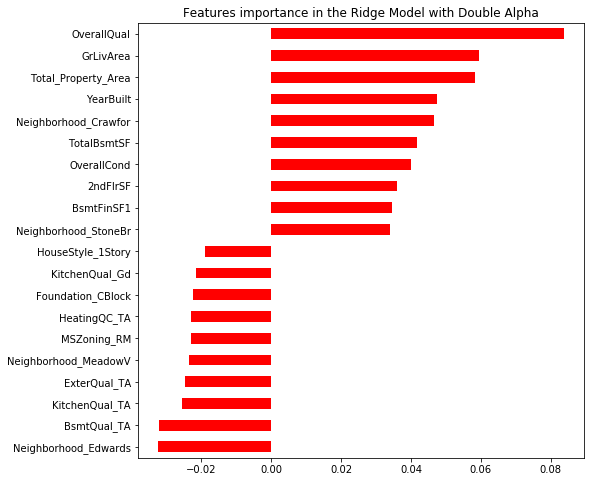

In [296]:
plt.figure(figsize=(8,8))
coefs = pd.Series(ridge_double_alpha.coef_, index = cleaned_df_out.columns)
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color='red')
plt.title("Features importance in the Ridge Model with Double Alpha");
plt.show()

In [297]:
# Let's check the Test and Train Mean Absolute Error!
ridge_reg=GridSearchCV(ridge_double_alpha, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)
ridge_reg.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=40, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [298]:
cv_results = pd.DataFrame(ridge_reg.cv_results_)
# we donot want the result for alpha's to be more than 200, just for time and memory saving purpose!
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.019588,0.001199,0.000200,0.000400,0.0001,{'alpha': 0.0001},-0.016928,-0.011632,-0.009003,-0.015002,-0.013589,-0.013235,0.002735,26,-0.006165,-0.007181,-0.007512,-0.006399,-0.006496,-0.006751,0.000509
1,0.014392,0.001019,0.000599,0.000489,0.001,{'alpha': 0.001},-0.016930,-0.011625,-0.008996,-0.015001,-0.013582,-0.013231,0.002738,25,-0.006165,-0.007181,-0.007512,-0.006399,-0.006496,-0.006751,0.000509
2,0.013393,0.000489,0.000599,0.000489,0.01,{'alpha': 0.01},-0.016950,-0.011561,-0.008949,-0.015000,-0.013517,-0.013200,0.002764,24,-0.006166,-0.007182,-0.007513,-0.006400,-0.006497,-0.006751,0.000509
3,0.014193,0.001166,0.000600,0.000490,0.05,{'alpha': 0.05},-0.017005,-0.011367,-0.008842,-0.015021,-0.013295,-0.013111,0.002834,23,-0.006178,-0.007188,-0.007524,-0.006408,-0.006512,-0.006762,0.000508
4,0.013995,0.000894,0.000799,0.000400,0.1,{'alpha': 0.1},-0.017042,-0.011207,-0.008771,-0.015026,-0.013098,-0.013034,0.002884,22,-0.006198,-0.007197,-0.007543,-0.006422,-0.006540,-0.006780,0.000506


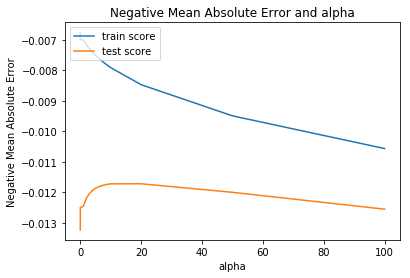

In [299]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

So we see that the **Train and Test Accuracy decreases, with increase in RMSE value!**

We got the variables such as **2nd Floor Surface Area, Basmenet Surface Area and now the Total Property Area is more important that Neighbourhood Crawfor!**

In [300]:
df_ridge = {'Alpha': [0.0001,1,20],'Train Accuracy':[Ridge_train_score,Ridge_train_score_1,Ridge_train_score_20],
                        'Test Accuracy':[Ridge_test_score,Ridge_test_score_1,Ridge_test_score_20]}
df = pd.DataFrame(data=df_ridge)
df.head()

,Alpha,Train Accuracy,Test Accuracy
0,0.0001,0.949792,0.923095
1,1.0000,0.948287,0.916269
2,20.0000,0.940014,0.914419


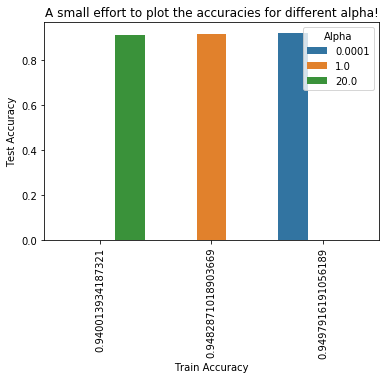

In [301]:
sns.barplot(x = 'Train Accuracy',y='Test Accuracy',hue = 'Alpha',data=df);
plt.xticks(rotation=90);
plt.title('A small effort to plot the accuracies for different alpha!');

# Lasso Regression!

In [302]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = parameters, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    7.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [303]:
print('The Best value of Alpha is: ',model_cv.best_params_)
print('The Best score achieved : ',model_cv.best_score_)

The Best value of Alpha is:  {'alpha': 0.001}
The Best score achieved :  -0.07542701942896253


***Alpha = 0.001***

In [304]:
alpha =0.001
lasso001 = Lasso(alpha=alpha)
lasso001.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

***Evaluation of the Scores!***

In [305]:
y_pred_train=lasso001.predict(X_train)
y_pred_test=lasso001.predict(X_test)
#Checking RMSE score! as evaluation metric!
print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_pred_train))))
print('Train R2 Score: ' + str(r2_score(y_train,y_pred_train)))
print('Test R2 Score: ' + str(r2_score(y_test,y_pred_test)))
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_pred_test))))  

Root Mean Square Error train = 0.09599238375363749
Train R2 Score: 0.936040993070808
Test R2 Score: 0.9114418496754247
Root Mean Square Error test = 0.1112182570088878


In [306]:
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print('Training Score: ',train_score001)
print('Testing Score: ',test_score001)
print('Number of Alive Coefficients!: ',coeff_used001)

Training Score:  0.936040993070808
Testing Score:  0.9114418496754247
Number of Alive Coefficients!:  70


***Alpha = 0.1***

In [307]:
alpha =0.1
lasso01 = Lasso(alpha=alpha)
lasso01.fit(X_train, y_train) 

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

***Evaluation of the Scores!***

In [308]:
y_pred_train=lasso01.predict(X_train)
y_pred_test=lasso01.predict(X_test)
#Checking RMSE score! as evaluation metric!
print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_pred_train))))
print('Train R2 Score: ' + str(r2_score(y_train,y_pred_train)))
print('Test R2 Score: ' + str(r2_score(y_test,y_pred_test)))
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_pred_test))))  

Root Mean Square Error train = 0.21522045606223117
Train R2 Score: 0.6784894313069609
Test R2 Score: 0.651164158210421
Root Mean Square Error test = 0.22073559248260077


In [309]:
train_score01=lasso01.score(X_train,y_train)
test_score01=lasso01.score(X_test,y_test)
coeff_used01 = np.sum(lasso01.coef_!=0)
print('Training Score: ',train_score01)
print('Testing Score: ',test_score01)
print('Number of Alive Coefficients!: ',coeff_used01)

Training Score:  0.6784894313069609
Testing Score:  0.6511641582104211
Number of Alive Coefficients!:  8


***Alpha = 1***

In [310]:
alpha =1
lasso1 = Lasso(alpha=alpha)
lasso1.fit(X_train, y_train) 

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

***Evaluation of the Scores!***

In [311]:
y_pred_train=lasso1.predict(X_train)
y_pred_test=lasso1.predict(X_test)
#Checking RMSE score! as evaluation metric!
print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_pred_train))))
print('Train R2 Score: ' + str(r2_score(y_train,y_pred_train)))
print('Test R2 Score: ' + str(r2_score(y_test,y_pred_test)))
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_pred_test))))  

Root Mean Square Error train = 0.3730290546411858
Train R2 Score: 0.034141562204087816
Test R2 Score: 0.03999580986254725
Root Mean Square Error test = 0.3661831703460363


In [312]:
train_score1=lasso1.score(X_train,y_train)
test_score1=lasso1.score(X_test,y_test)
coeff_used1 = np.sum(lasso1.coef_!=0)
print('Training Score: ',train_score1)
print('Testing Score: ',test_score1)
print('Number of Alive Coefficients!: ',coeff_used1)

Training Score:  0.034141562204087816
Testing Score:  0.03999580986254725
Number of Alive Coefficients!:  4


**What if we double the value of ALPHA!**
Let's see.

**Alpha = 0.002**

In [313]:
alpha =0.002
lasso002 = Lasso(alpha=alpha)
lasso002.fit(X_train, y_train) 

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

***Evaluation of the Scores!***

In [314]:
# Evaluating the Scores!
y_pred_train=lasso002.predict(X_train)
y_pred_test=lasso002.predict(X_test)
#Checking RMSE score! as evaluation metric!
print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_pred_train))))
print('Train R2 Score: ' + str(r2_score(y_train,y_pred_train)))
print('Test R2 Score: ' + str(r2_score(y_test,y_pred_test)))
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_pred_test))))  

Root Mean Square Error train = 0.10317942136447175
Train R2 Score: 0.9261051222619527
Test R2 Score: 0.9015750520057679
Root Mean Square Error test = 0.11725042162540528


Let's see the Variables Now!

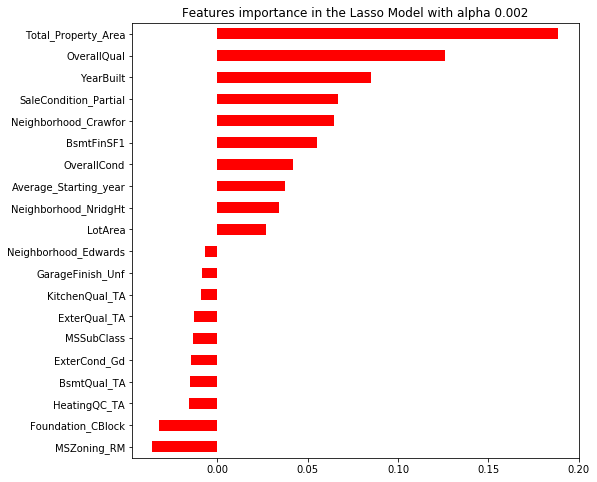

In [315]:
plt.figure(figsize=(8,8))
coefs = pd.Series(lasso002.coef_, index = cleaned_df_out.columns)
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color='r')
plt.title("Features importance in the Lasso Model with alpha 0.002")
plt.show()

So we see that the **Train and Test Accuracy decreases, with increase in RMSE value!**

We got the variables such as **Lot Area, Basmenet Surface Area and now the Total Property Area is more important that Neighbourhood Crawfor!**

In [316]:
cv_results = pd.DataFrame(model_cv.cv_results_)
# we donot want the result for alpha's to be more than 200, just for time and memory saving purpose!
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.656226,0.098143,0.001199,0.000400,0.0001,{'alpha': 0.0001},-0.089850,-0.074150,-0.072471,-0.076528,-0.078256,-0.078265,0.006137,2,-0.056583,-0.060451,-0.061641,-0.058407,-0.057644,-0.058945,0.001849
1,0.241662,0.052191,0.000799,0.000748,0.001,{'alpha': 0.001},-0.085436,-0.069581,-0.072305,-0.073127,-0.076625,-0.075427,0.005500,1,-0.063728,-0.068021,-0.067961,-0.066429,-0.066010,-0.066430,0.001572
2,0.048572,0.003322,0.000399,0.000489,0.01,{'alpha': 0.01},-0.102906,-0.083688,-0.078957,-0.078659,-0.090557,-0.086972,0.009076,3,-0.080234,-0.084281,-0.085269,-0.084549,-0.083399,-0.083546,0.001761
3,0.016990,0.001413,0.000401,0.000491,0.05,{'alpha': 0.05},-0.143065,-0.113796,-0.110591,-0.108392,-0.136741,-0.122542,0.014447,4,-0.117021,-0.122681,-0.123140,-0.121882,-0.118495,-0.120644,0.002435
4,0.015195,0.001166,0.000800,0.000400,0.1,{'alpha': 0.1},-0.180451,-0.154828,-0.154465,-0.150839,-0.190608,-0.166255,0.016134,5,-0.158381,-0.165622,-0.165656,-0.164536,-0.163077,-0.163455,0.002705


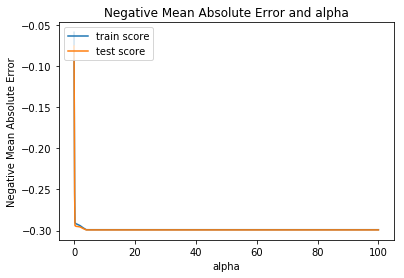

In [317]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Hence **Alpha = 0.001** is Justified!

Now let's plot the variables which have been received from performing the Lasso Regression and which one is more important towards predicting the House Price!

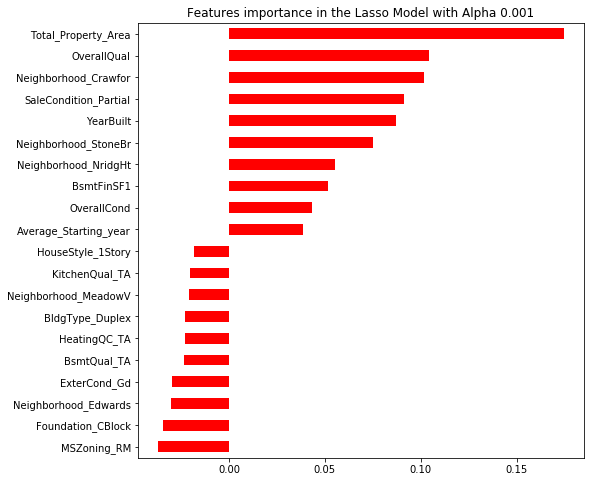

In [318]:
plt.figure(figsize=(8,8))
coefs = pd.Series(lasso001.coef_, index = cleaned_df_out.columns)
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color='r')
plt.title("Features importance in the Lasso Model with Alpha 0.001")
plt.show()

### Ridge Regression Inferences:

Top 10 driving factors are:
1. Overall Quality of the property.
2. Neighbourhood Crawfor of the property.
3. Ground Living Area of the property.
4. Total Area of property.
5. Year built of the property.
6. Neighbourhood placement with Stone Brook.
7. Over all condition of the property.
8. Total Basement Surface Area of the property.
9. Sale Condition of the property which has to be partial.
10. Neighbourhood placement with Northridge Heights.

### Lasso Regression Inferences:

Top 10 driving factors are:
1. Overall Quality of the property.
2. Neighbourhood Crawfor of the property.
3. Average Starting Life of the property.
4. Total Area of property.
5. Year built of the property.
6. Neighbourhood placement with Stone Brook.
7. Over all condition of the property.
8. Total Basement Surface Area of the property.
9. Sale Condition of the property which has to be partial.
10. Neighbourhood placement with Northridge Heights.

Also, choosing the type of Regression as Final Answer would be **LASSO REGRESSION** as it produces a good output of **Train Accuracy as 93% and Test Accuracy of 91%** with **Alpha as 0.001**.
Hence it more Simpler and Generalisable!

So we saw the results of the **Ridge and Lasso** regression for predicting the House Prices.
The Answer for the Company's questions: 
1. Which variables are significant in predicting the price of a house? =>
 **Varibales such as Total Area of the Property, Over all condition of the property, Year in which the property was built, Neighbourhood establishment of the property, Over all quality of the property** are the variables which are driving the **Sale Price of the House**. The better these variables are, the higher the selling price should be/would be.
2. How well those variables describe the price of a house.? =>
  Business aspect these variables tend to influence the selling price. The larger the compound of the proeprty is, the higher the selling price is, as there is more room for modification. Whihc infact is described by the variables **Sale Condition to be partial.**

## We have a Question is Subjective Assignment : 
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

**For this, we intend to drop those 5 features and build and the model again!** Those 5 features are:
1. Neighbourhood Crawfor
2. Neighbourhood Placement with NridgHt
3. Total Area of property
4. Neighbourhood Placement with Stone Brook
5. Partial Condition Sale of Property

In [319]:
# We make a new fresh Data Frame as copy of the original prepared Data Frame!
df_without_top5_derived_variables = cleaned_df_out.copy()
df_without_top5_derived_variables.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Total_Property_Area,Total_Bathrooms,Average_Starting_year,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,4824,2.5,2003.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0

In [320]:
# We drop the top 5 variables which have to excluded as asked in the question.
cols_to_drop = ['Total_Property_Area','SaleCondition_Partial','Neighborhood_StoneBr','Neighborhood_Crawfor','Neighborhood_NridgHt']
df_without_top5_derived_variables.drop(cols_to_drop,axis=1,inplace=True)

In [321]:
# Just checking the Columns as a List!
print(df_without_top5_derived_variables.columns.to_list())

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Total_Bathrooms', 'Average_Starting_year', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Ne

In [322]:
# scaling the features
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(df_without_top5_derived_variables, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)
scaler=RobustScaler()
# transform "x_train"
X_train = scaler.fit_transform(X_train)
# transform "x_test"
X_test = scaler.transform(X_test)

In [323]:
# Now we need to perform the Lasso Regression as a new Model Building process and find out the New Top 5 variables!
lasso = Lasso()

# list of alphas to tune
parameters= {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = parameters, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    5.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [324]:
print('The Best value of Alpha is: ',model_cv.best_params_)
print('The Best score achieved : ',model_cv.best_score_)

The Best value of Alpha is:  {'alpha': 0.001}
The Best score achieved :  -0.07907571098772309


In [325]:
# Now we explore the Best Alpha value!
alpha =0.001
lasso001 = Lasso(alpha=alpha)
lasso001.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [326]:
# Evaluating the Scores!
y_pred_train=lasso001.predict(X_train)
y_pred_test=lasso001.predict(X_test)
#Checking RMSE score! as evaluation metric!
print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_pred_train))))
print('Train R2 Score: ' + str(r2_score(y_train,y_pred_train)))
print('Test R2 Score: ' + str(r2_score(y_test,y_pred_test)))
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_pred_test))))  

Root Mean Square Error train = 0.09967372061186498
Train R2 Score: 0.9310412312430209
Test R2 Score: 0.9095616782971797
Root Mean Square Error test = 0.11239268937025185


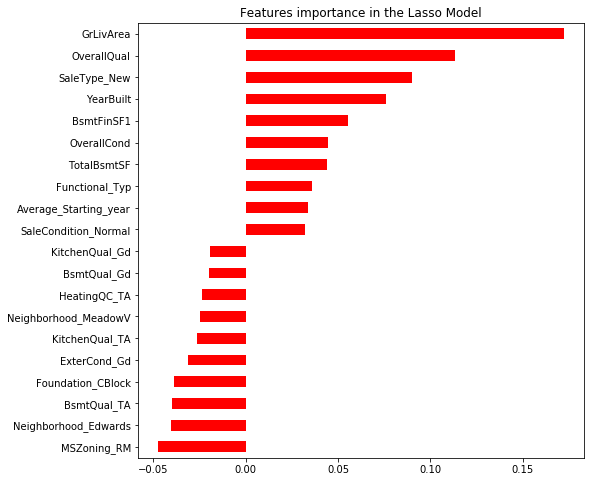

In [327]:
plt.figure(figsize=(8,8))
coefs = pd.Series(lasso001.coef_, index = df_without_top5_derived_variables.columns)
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color='r')
plt.title("Features importance in the Lasso Model")
plt.show()

Now the top 5 features are:
1. Ground Living Area of the Property.
2. Over All Quality of the Property.
3. Sale Type as New which means the properties which are Newly made and instantly sold.
4. Year in which the home is built.
5. Type 1 Basement finished in Square feet.

The theoretical answer is mentioned in the PDF!